# MRP (Creditworthiness) - Submitted By Yashi_Garg

# EDA 

In [104]:
#pip install seaborn

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
# there are two csv files in this Lending Club loan dataset (accepted_2007_to_2018Q4.csv,rejected_2007_to_2018Q4.csv)


acc_df = pd.read_csv("C:\\Users\\yashi\\Downloads\\MRP\\Dataset\\Lending_Club_Dataset\\accepted_2007_to_2018q4.csv\\accepted_2007_to_2018Q4.csv")
acc_df.head()



C:\Users\yashi\AppData\Local\Temp/ipykernel_24432/155855730.py:4: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  acc_df = pd.read_csv("C:\\Users\\yashi\\Downloads\\MRP\\Dataset\\Lending_Club_Dataset\\accepted_2007_to_2018q4.csv\\accepted_2007_to_2018Q4.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
acc_df.shape #checking shape of the dataframe

(2260701, 151)

In [108]:
# Let's check the no. of missing values in each column
acc_df.isnull().sum()

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [109]:
# and the % of missing values in each column
round(acc_df.isnull().sum()/len(acc_df.index), 2)*100

id                         0.0
member_id                100.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
                         ...  
settlement_status         98.0
settlement_date           98.0
settlement_amount         98.0
settlement_percentage     98.0
settlement_term           98.0
Length: 151, dtype: float64

In [110]:
# there are many columns which have so many missing values
# now removing the columns having more than 35% missing values, as these would be unneccessary for our analysis
missing_columns = acc_df.columns[100*(acc_df.isnull().sum()/len(acc_df.index)) > 35]
print(missing_columns)

Index(['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount'

In [111]:
# drop the missing columns

acc_df = acc_df.drop(missing_columns, axis=1)
print(acc_df.shape)

(2260701, 93)


In [112]:
acc_df.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 93 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   funded_amnt                 float64
 3   funded_amnt_inv             float64
 4   term                        object 
 5   int_rate                    float64
 6   installment                 float64
 7   grade                       object 
 8   sub_grade                   object 
 9   emp_title                   object 
 10  emp_length                  object 
 11  home_ownership              object 
 12  annual_inc                  float64
 13  verification_status         object 
 14  issue_d                     object 
 15  loan_status                 object 
 16  pymnt_plan                  object 
 17  url                         object 
 18  purpose                     object 
 19  title                

In [113]:
# let's check the categorical values of our target column

acc_df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

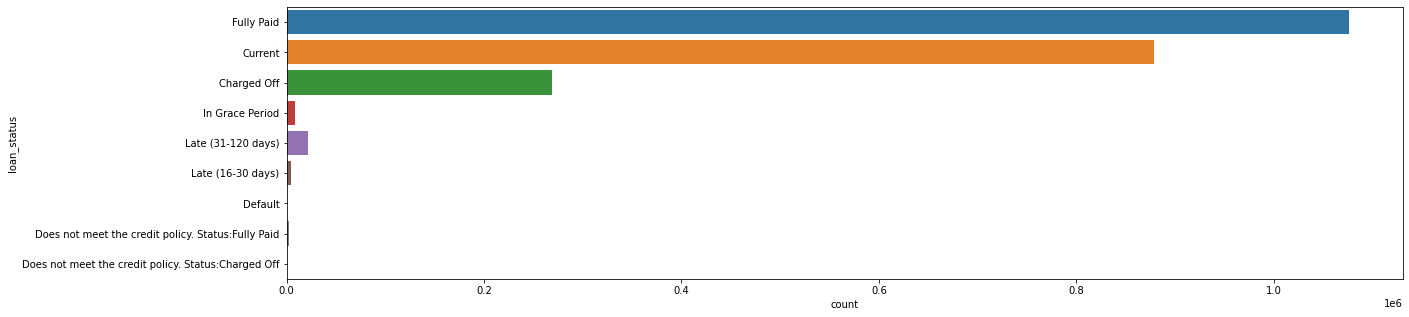

In [114]:
# visualize these categorical values
fig = plt.figure(figsize=(20,5))
sns.countplot(y='loan_status', data=acc_df);


In [115]:
#taking only Fully paid and charged off category which are more relevant in our analysis

array = ['Charged Off', 'Fully Paid']
acc_df = acc_df.loc[acc_df['loan_status'].isin(array)]
acc_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
5,68426831,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,...,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


In [116]:
# Set values for the categories as 1 and 0

set_value = {"loan_status": { "Fully Paid": 1.0, "Charged Off": 0.0}}
acc_df = acc_df.replace(set_value)
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 93 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1345310 non-null  object 
 1   loan_amnt                   1345310 non-null  float64
 2   funded_amnt                 1345310 non-null  float64
 3   funded_amnt_inv             1345310 non-null  float64
 4   term                        1345310 non-null  object 
 5   int_rate                    1345310 non-null  float64
 6   installment                 1345310 non-null  float64
 7   grade                       1345310 non-null  object 
 8   sub_grade                   1345310 non-null  object 
 9   emp_title                   1259525 non-null  object 
 10  emp_length                  1266799 non-null  object 
 11  home_ownership              1345310 non-null  object 
 12  annual_inc                  1345310 non-null  float64
 1

In [117]:
acc_df['loan_status'].value_counts() #check the count 

1.0    1076751
0.0     268559
Name: loan_status, dtype: int64

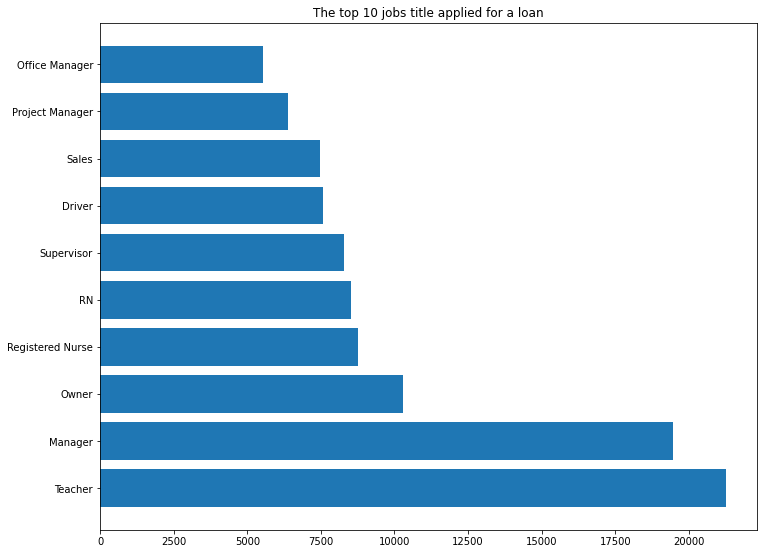

In [118]:
#visualize the top 10 jobs title applied for a loan

plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 2)
plt.barh(acc_df.emp_title.value_counts()[:10].index, acc_df.emp_title.value_counts()[:10])
plt.title("The top 10 jobs title applied for a loan")
plt.tight_layout()

In [119]:
# visualize the columns, I took this code from internet (merge all visualization in one)

def create_countplot(axes, x_val,order_val, title, rotation="n"):
    sns.countplot(ax= axes, data=acc_df, x=x_val, order = order_val.value_counts(dropna= False).index,hue = "loan_status")
    axes.set_title(title)
    if rotation =="y":
        axes.set_xticklabels(list(order_val.unique()), rotation=90)

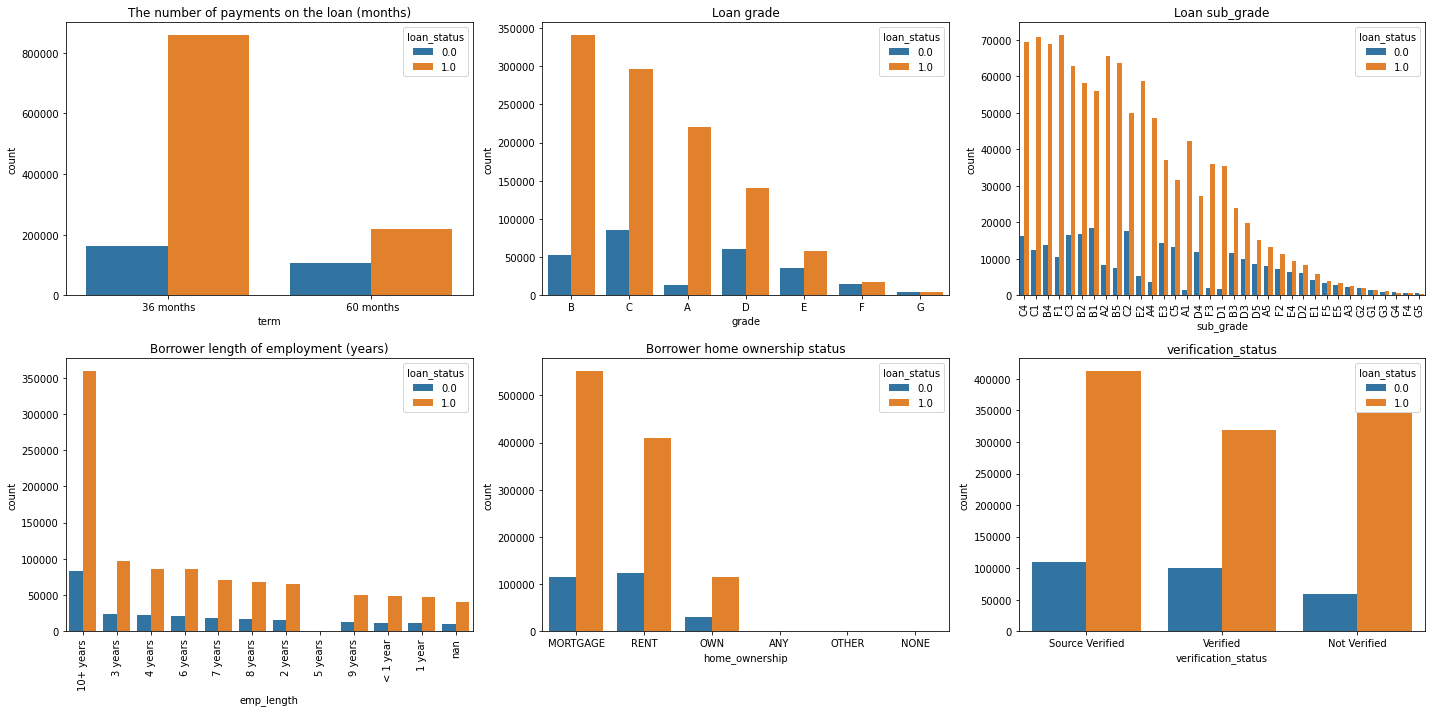

In [120]:
fig, ax = plt.subplots(2,3, figsize= (20,10))

create_countplot(ax[0,0],'term', acc_df["term"],"The number of payments on the loan (months)" )

create_countplot(ax[0,1],'grade', acc_df["grade"],"Loan grade")

create_countplot(ax[0,2],'sub_grade', acc_df["sub_grade"],"Loan sub_grade","y")

create_countplot(ax[1,0],'emp_length', acc_df["emp_length"],"Borrower length of employment (years)", "y" )

create_countplot(ax[1,1],'home_ownership', acc_df["home_ownership"],"Borrower home ownership status" )

create_countplot(ax[1,2],'verification_status', acc_df["verification_status"],"verification_status" )

plt.tight_layout()
plt.show()

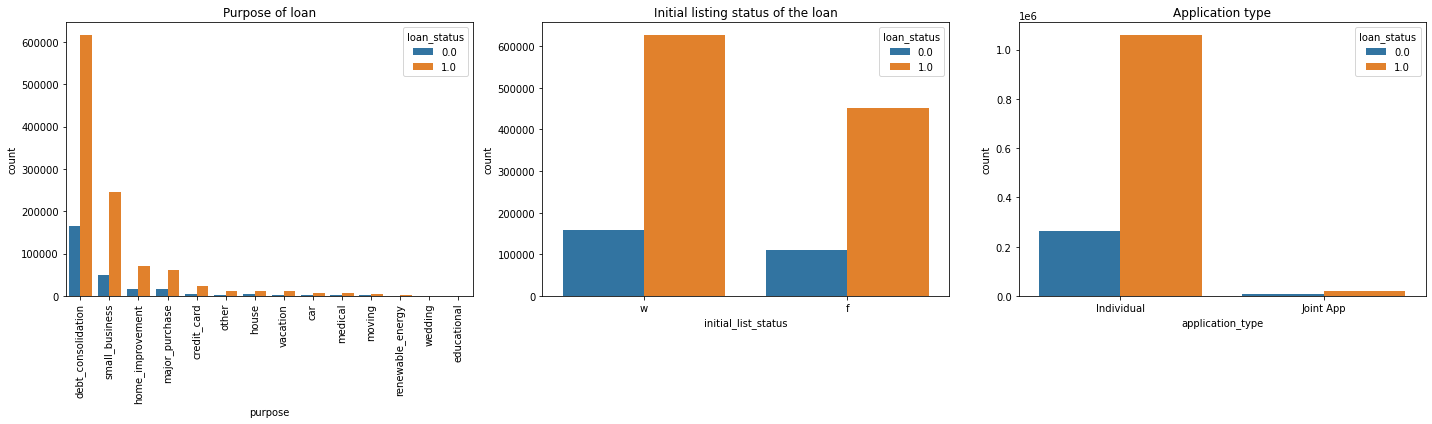

In [121]:
fig, ax = plt.subplots(1,3, figsize= (20,6))

create_countplot(ax[0],'purpose', acc_df["purpose"],"Purpose of loan" ,"y")
create_countplot(ax[1],'initial_list_status', acc_df["initial_list_status"],"Initial listing status of the loan" )
create_countplot(ax[2],'application_type', acc_df["application_type"],"Application type" )



plt.tight_layout()
plt.show()

# Preprocessing

In [122]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 93 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1345310 non-null  object 
 1   loan_amnt                   1345310 non-null  float64
 2   funded_amnt                 1345310 non-null  float64
 3   funded_amnt_inv             1345310 non-null  float64
 4   term                        1345310 non-null  object 
 5   int_rate                    1345310 non-null  float64
 6   installment                 1345310 non-null  float64
 7   grade                       1345310 non-null  object 
 8   sub_grade                   1345310 non-null  object 
 9   emp_title                   1259525 non-null  object 
 10  emp_length                  1266799 non-null  object 
 11  home_ownership              1345310 non-null  object 
 12  annual_inc                  1345310 non-null  float64
 1

In [123]:
# let's select some features for our analysis as there are so many features

selected_features=['loam_amnt','term','int_rate','grade','dti','loan_status','emp_length','annual_inc','application_type','home_ownership']



In [125]:
#drop the other features, just keep the selected features
drop = [col for col in acc_df.columns if col not in selected_features]
acc_df=acc_df.drop(drop,axis=1)

In [126]:
acc_df.shape

(1345310, 9)

In [127]:
acc_df.isnull().sum()

term                    0
int_rate                0
grade                   0
emp_length          78511
home_ownership          0
annual_inc              0
loan_status             0
dti                   374
application_type        0
dtype: int64

In [ ]:
# Exploring the features

In [129]:
acc_df['emp_length'].describe()

count       1266799
unique           11
top       10+ years
freq         442199
Name: emp_length, dtype: object

In [130]:
emp_length_to_int={'< 1 year':0.5,
                      '1 year':1,
                     '2 years':2,
                     '3 years':3,
                     '4 years':4,
                     '5 years':5,
                     '6 years':6,
                     '7 years':7,
                     '8 years':8,
                     '9 years':9,
                     '10+ years':10}
acc_df['emp_length'] = acc_df['emp_length'].map(emp_length_to_int)

In [131]:
mode_emp=acc_df['emp_length'].mode()[0]
mode_emp

10.0

In [133]:
acc_df['emp_length'].fillna(mode_emp,inplace= True)
acc_df.isnull().sum()

term                  0
int_rate              0
grade                 0
emp_length            0
home_ownership        0
annual_inc            0
loan_status           0
dti                 374
application_type      0
dtype: int64

In [134]:
acc_df['dti'].describe()

count    1.344936e+06
mean     1.828267e+01
std      1.116045e+01
min     -1.000000e+00
25%      1.179000e+01
50%      1.761000e+01
75%      2.406000e+01
max      9.990000e+02
Name: dti, dtype: float64

In [135]:
mean_dti=acc_df['dti'].mean()
mean_dti


18.282666915005624

In [136]:

acc_df['dti'].fillna(mean_dti,inplace= True)

In [137]:
acc_df.isnull().sum()

term                0
int_rate            0
grade               0
emp_length          0
home_ownership      0
annual_inc          0
loan_status         0
dti                 0
application_type    0
dtype: int64

In [138]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   term              1345310 non-null  object 
 1   int_rate          1345310 non-null  float64
 2   grade             1345310 non-null  object 
 3   emp_length        1345310 non-null  float64
 4   home_ownership    1345310 non-null  object 
 5   annual_inc        1345310 non-null  float64
 6   loan_status       1345310 non-null  float64
 7   dti               1345310 non-null  float64
 8   application_type  1345310 non-null  object 
dtypes: float64(5), object(4)
memory usage: 102.6+ MB


In [139]:
# columns that have categorical values
categorical_columns = acc_df.select_dtypes(include=['object']).copy()
print(categorical_columns.shape)

(1345310, 4)


In [140]:
# columns that have numeric values
numeric_columns = acc_df.select_dtypes(exclude=['object']).copy()
print(numeric_columns.shape)

(1345310, 5)


In [141]:
categorical_columns.columns

Index(['term', 'grade', 'home_ownership', 'application_type'], dtype='object')

In [142]:
numeric_columns.columns

Index(['int_rate', 'emp_length', 'annual_inc', 'loan_status', 'dti'], dtype='object')

In [144]:
acc_df=acc_df[acc_df['dti'] < 100]




In [145]:
acc_df.shape

(1344775, 9)

In [146]:
acc_df=acc_df[acc_df['annual_inc'] < 10000000]


In [147]:
acc_df.shape

(1344774, 9)

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix


In [149]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [150]:
acc_df['term'] = le.fit_transform(acc_df['term'])
acc_df['term'].value_counts()

0    1020429
1     324345
Name: term, dtype: int64

In [151]:
acc_df['grade'] = le.fit_transform(acc_df['grade'])
acc_df['grade'].value_counts()

1    392616
2    381529
0    235041
3    200836
4     93592
5     32042
6      9118
Name: grade, dtype: int64

In [152]:
acc_df['home_ownership'] = le.fit_transform(acc_df['home_ownership'])
acc_df['home_ownership'].value_counts()

1    665212
5    534296
4    144789
0       286
3       144
2        47
Name: home_ownership, dtype: int64

In [153]:
app_to_int={'Individual':1,'Joint App':0}
acc_df['application_type'] = acc_df['application_type'].map(app_to_int)
acc_df['application_type'].value_counts()

1    1319509
0      25265
Name: application_type, dtype: int64

In [154]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344774 entries, 0 to 2260697
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   term              1344774 non-null  int32  
 1   int_rate          1344774 non-null  float64
 2   grade             1344774 non-null  int32  
 3   emp_length        1344774 non-null  float64
 4   home_ownership    1344774 non-null  int32  
 5   annual_inc        1344774 non-null  float64
 6   loan_status       1344774 non-null  float64
 7   dti               1344774 non-null  float64
 8   application_type  1344774 non-null  int64  
dtypes: float64(5), int32(3), int64(1)
memory usage: 87.2 MB


In [58]:
#acc_df.isnull().sum()

In [157]:
acc_df['loan_status'].value_counts()

1.0    1076358
0.0     268416
Name: loan_status, dtype: int64

In [158]:
#acc_df.isnull().sum()

# Split the data into Train and Test

In [159]:
X = acc_df.drop('loan_status', axis=1)
y = acc_df['loan_status']

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42) # keeping 33% for test 

# Scaling the data

In [161]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [162]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((900998, 8), (443776, 8), (900998,), (443776,))

# Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report
rf = RandomForestClassifier(n_estimators=100)
#print(X_train)
#print(y_train)
rf.fit(X_train,y_train)
RandomForestClassifier()
preds = rf.predict(X_test)


In [165]:
accuracy_rf= accuracy_score(preds,y_test)*100
print('Accuracy of Regularized Random Forest is: {:.2f}'.format(accuracy_rf))

Accuracy of Regularized Random Forest is: 78.38


In [166]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.39      0.14      0.21     88404
         1.0       0.82      0.94      0.87    355372

    accuracy                           0.78    443776
   macro avg       0.60      0.54      0.54    443776
weighted avg       0.73      0.78      0.74    443776



C:\Users\yashi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


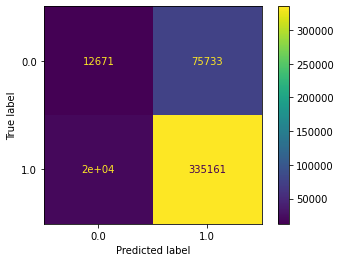

In [167]:
plot_confusion_matrix(rf,X_test,y_test)

# Logistic Regression

In [168]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',C=0.01,solver='newton-cg')
lr.fit(X_train,y_train)

LogisticRegression(C=0.01, solver='newton-cg')

In [169]:
pred_lr = lr.predict(X_test)

In [170]:
accuracy_lr= accuracy_score(pred_lr,y_test)*100
print('Accuracy of Regularized Logistic Regression is: {:.2f}'.format(accuracy_lr))

Accuracy of Regularized Logistic Regression is: 80.14


In [171]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

         0.0       0.51      0.07      0.13     88404
         1.0       0.81      0.98      0.89    355372

    accuracy                           0.80    443776
   macro avg       0.66      0.53      0.51    443776
weighted avg       0.75      0.80      0.74    443776



C:\Users\yashi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


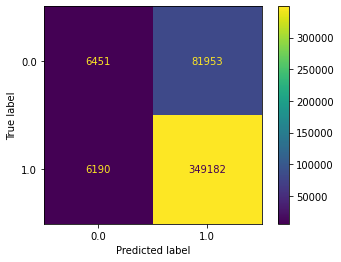

In [172]:
plot_confusion_matrix(lr,X_test,y_test)

# XGBoost Classifier

In [173]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\yashi\anaconda3\python.exe -m pip install --upgrade pip' command.


In [174]:
from xgboost import XGBClassifier

In [175]:
# fit model to training data
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [176]:
preds_xgb = xgb.predict(X_test) 

In [177]:
accuracy_xgb= accuracy_score(preds_xgb,y_test)*100
print('Accuracy of Regularized XGBoost is: {:.2f}'.format(accuracy_xgb))

Accuracy of Regularized XGBoost is: 80.29


In [178]:
print(classification_report(y_test,preds_xgb))

              precision    recall  f1-score   support

         0.0       0.54      0.07      0.12     88404
         1.0       0.81      0.99      0.89    355372

    accuracy                           0.80    443776
   macro avg       0.68      0.53      0.50    443776
weighted avg       0.76      0.80      0.74    443776



C:\Users\yashi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


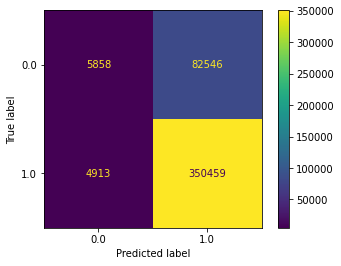

In [179]:
plot_confusion_matrix(xgb,X_test,y_test)

# Artificial Neural Networks (ANNs)

In [180]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [181]:
model = Sequential()

# input layer
model.add(Dense(119,  activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.1))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')



In [182]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=10,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/10
3520/3520 [==============================] - 12s 3ms/step - loss: 0.4637 - val_loss: 0.4578
Epoch 2/10
3520/3520 [==============================] - 10s 3ms/step - loss: 0.4603 - val_loss: 0.4574
Epoch 3/10
3520/3520 [==============================] - 11s 3ms/step - loss: 0.4598 - val_loss: 0.4575
Epoch 4/10
3520/3520 [==============================] - 11s 3ms/step - loss: 0.4596 - val_loss: 0.4570
Epoch 5/10
3520/3520 [==============================] - 11s 3ms/step - loss: 0.4594 - val_loss: 0.4572
Epoch 6/10
3520/3520 [==============================] - 12s 3ms/step - loss: 0.4592 - val_loss: 0.4569
Epoch 7/10
3520/3520 [==============================] - 11s 3ms/step - loss: 0.4592 - val_loss: 0.4580
Epoch 8/10
3520/3520 [==============================] - 12s 3ms/step - loss: 0.4590 - val_loss: 0.4578
Epoch 9/10
3520/3520 [==============================] - 11s 3ms/step - loss: 0.4588 - val_loss: 0.4568
Epoch 10/10
3520/3520 [==============================] - 12s 3ms/step - l

In [183]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

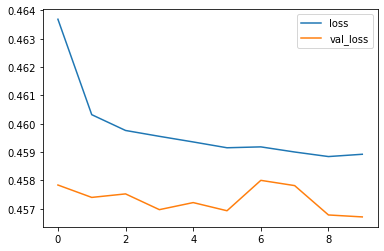

In [184]:
losses[['loss','val_loss']].plot()

In [190]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.57      0.03      0.05     88404
         1.0       0.80      0.99      0.89    355372

    accuracy                           0.80    443776
   macro avg       0.69      0.51      0.47    443776
weighted avg       0.76      0.80      0.72    443776



In [188]:
accuracy_ann= accuracy_score(predictions,y_test)*100
print('Accuracy of Regularized ANN is: {:.2f}'.format(accuracy_ann))

Accuracy of Regularized ANN is: 74.95


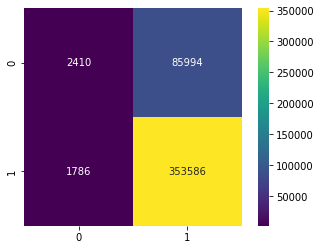

In [186]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,predictions)
f = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', square=True) #plot_confusion_matrix does not work directly for ANN

In [187]:
predictions = (model.predict(X_test) > 0.7).astype("int32")
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.38      0.40      0.39     88404
         1.0       0.85      0.84      0.84    355372

    accuracy                           0.75    443776
   macro avg       0.61      0.62      0.61    443776
weighted avg       0.75      0.75      0.75    443776



# Conclusion

In conclusion, here we have trained 4 different classifiers to predict the customers whose loan was paid fully and whose loan was charged off.
These models, far from perfect, was an attempt to predict the lenders who will pay fully or who would not be able to pay back the loan amount.
Although, there is definitely a scope of improvement by examining more features and testing different parameters for different models.